In [1]:
!nvidia-smi

Tue Dec 13 16:21:04 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 512.72       Driver Version: 512.72       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   57C    P8    10W /  N/A |   1733MiB /  6144MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", tf.config.list_physical_devices('GPU'))
print("1.",tf.test.is_gpu_available)
print("2",tf.test.gpu_device_name)

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

# sess = tf.compat.v1.Session(config=tf.ConfigProto(log_device_placement=True))


Num GPUs Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
1. <function is_gpu_available at 0x00000232D1594C18>
2 <function gpu_device_name at 0x00000232D15930D8>
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16051699072667814316
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3665166336
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9699476769645225801
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
]


!pip install opencv-python

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
import numpy as np 
import pandas as pd
import cv2
import os

from matplotlib import pyplot as plt

# Image Extraction
    - Folder:
        1. Anger
        2. Contempt
        3. Disgust
        4. Fear
        5. Happy
        6. Sadness
        7. Surprise 

In [5]:
data_loc = 'Dataset/FER/train'
data_dir = os.listdir(data_loc)
print(data_dir)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [6]:
image_list_arr = []
OTSU_scale_img = []
TRIANGLE_scale_img = []
for emotion_dirs in data_dir:
    emotions = os.listdir(data_loc+'/'+emotion_dirs)
#     print("emotions",emotions)
    for images in emotions:
        img_read = cv2.imread(data_loc+'/'+emotion_dirs+'/'+images)
        img_read_resize = cv2.resize(img_read,(64,64))
#         RGB = cv2.cvtColor(img_read_resize, cv2.COLOR_BGR2GRAY)
#         ret2, thres2 = cv2.threshold(RGB, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#         ret3, thres3 = cv2.threshold(RGB, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_TRIANGLE)
#         ret, thres = cv2.threshold(RGB, ret2, 255, cv2.THRESH_BINARY)

#         print("ret",ret)
#         print("ret2",ret2)
#         print("ret3",ret3)

#         OTSU_scale_img.append(thres2)
#         TRIANGLE_scale_img.append(thres3)
        image_list_arr.append(img_read_resize)


# Threshold Representation (OTSU)

In [7]:
# plt.imshow(OTSU_scale_img[5])

In [8]:
# plt.imshow(OTSU_scale_img[5],cmap="gray")

# Threshold Representation (TRIANGLE)

In [9]:
# plt.imshow(TRIANGLE_scale_img[5])

In [10]:
# plt.imshow(TRIANGLE_scale_img[5],cmap="gray")

# Final Segmentation method selection (OTSU)

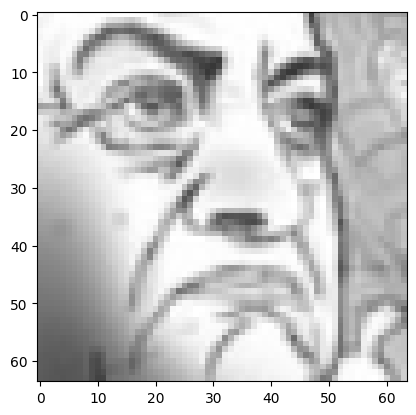

In [11]:
plt.imshow(image_list_arr[5])

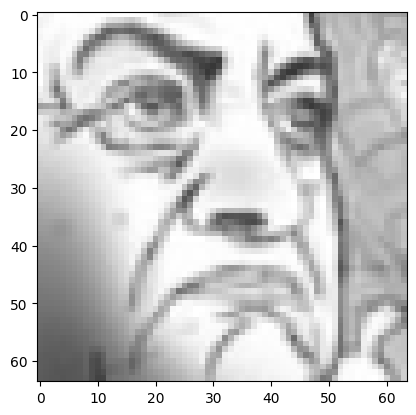

In [12]:
plt.imshow(image_list_arr[5],cmap="gray")

In [13]:
loaded_img_data = np.array(image_list_arr)
loaded_img_data

array([[[[ 46,  46,  46],
         [ 38,  38,  38],
         [ 31,  31,  31],
         ...,
         [ 12,  12,  12],
         [ 16,  16,  16],
         [ 22,  22,  22]],

        [[ 49,  49,  49],
         [ 37,  37,  37],
         [ 27,  27,  27],
         ...,
         [ 11,  11,  11],
         [ 15,  15,  15],
         [ 21,  21,  21]],

        [[ 50,  50,  50],
         [ 36,  36,  36],
         [ 24,  24,  24],
         ...,
         [ 15,  15,  15],
         [ 17,  17,  17],
         [ 21,  21,  21]],

        ...,

        [[211, 211, 211],
         [198, 198, 198],
         [169, 169, 169],
         ...,
         [195, 195, 195],
         [202, 202, 202],
         [204, 204, 204]],

        [[211, 211, 211],
         [203, 203, 203],
         [183, 183, 183],
         ...,
         [186, 186, 186],
         [195, 195, 195],
         [198, 198, 198]],

        [[208, 208, 208],
         [203, 203, 203],
         [190, 190, 190],
         ...,
         [174, 174, 174],
        

RGB values are usually stored as integers to save memory. But doing math on colors is usually done in float because it's easier, more powerful, and more precise. The act of converting floats to integers is called "Quantization", and it throws away precision.

Typically, RGB values are encoded as 8-bit integers, which range from 0 to 255. It's an industry standard to think of 0.0f as black and 1.0f as white (max brightness). To convert [0, 255] to [0.0f, 1.0f] all you have to do is divide by 255.0f.

If you care, this is the formula to convert back to integer: (int)floor(x * 255.0f + 0.5f). But first clamp x to [0.0f, 1.0f] if necessary.

In [14]:
loaded_img_data = loaded_img_data.astype('float32')
loaded_img_data

array([[[[ 46.,  46.,  46.],
         [ 38.,  38.,  38.],
         [ 31.,  31.,  31.],
         ...,
         [ 12.,  12.,  12.],
         [ 16.,  16.,  16.],
         [ 22.,  22.,  22.]],

        [[ 49.,  49.,  49.],
         [ 37.,  37.,  37.],
         [ 27.,  27.,  27.],
         ...,
         [ 11.,  11.,  11.],
         [ 15.,  15.,  15.],
         [ 21.,  21.,  21.]],

        [[ 50.,  50.,  50.],
         [ 36.,  36.,  36.],
         [ 24.,  24.,  24.],
         ...,
         [ 15.,  15.,  15.],
         [ 17.,  17.,  17.],
         [ 21.,  21.,  21.]],

        ...,

        [[211., 211., 211.],
         [198., 198., 198.],
         [169., 169., 169.],
         ...,
         [195., 195., 195.],
         [202., 202., 202.],
         [204., 204., 204.]],

        [[211., 211., 211.],
         [203., 203., 203.],
         [183., 183., 183.],
         ...,
         [186., 186., 186.],
         [195., 195., 195.],
         [198., 198., 198.]],

        [[208., 208., 208.],
       

In [15]:
loaded_img_data = loaded_img_data/255
loaded_img_data

array([[[[0.18039216, 0.18039216, 0.18039216],
         [0.14901961, 0.14901961, 0.14901961],
         [0.12156863, 0.12156863, 0.12156863],
         ...,
         [0.04705882, 0.04705882, 0.04705882],
         [0.0627451 , 0.0627451 , 0.0627451 ],
         [0.08627451, 0.08627451, 0.08627451]],

        [[0.19215687, 0.19215687, 0.19215687],
         [0.14509805, 0.14509805, 0.14509805],
         [0.10588235, 0.10588235, 0.10588235],
         ...,
         [0.04313726, 0.04313726, 0.04313726],
         [0.05882353, 0.05882353, 0.05882353],
         [0.08235294, 0.08235294, 0.08235294]],

        [[0.19607843, 0.19607843, 0.19607843],
         [0.14117648, 0.14117648, 0.14117648],
         [0.09411765, 0.09411765, 0.09411765],
         ...,
         [0.05882353, 0.05882353, 0.05882353],
         [0.06666667, 0.06666667, 0.06666667],
         [0.08235294, 0.08235294, 0.08235294]],

        ...,

        [[0.827451  , 0.827451  , 0.827451  ],
         [0.7764706 , 0.7764706 , 0.7764706 ]

In [16]:
loaded_img_data.shape

(35887, 64, 64, 3)

In [17]:
loaded_img_data

array([[[[0.18039216, 0.18039216, 0.18039216],
         [0.14901961, 0.14901961, 0.14901961],
         [0.12156863, 0.12156863, 0.12156863],
         ...,
         [0.04705882, 0.04705882, 0.04705882],
         [0.0627451 , 0.0627451 , 0.0627451 ],
         [0.08627451, 0.08627451, 0.08627451]],

        [[0.19215687, 0.19215687, 0.19215687],
         [0.14509805, 0.14509805, 0.14509805],
         [0.10588235, 0.10588235, 0.10588235],
         ...,
         [0.04313726, 0.04313726, 0.04313726],
         [0.05882353, 0.05882353, 0.05882353],
         [0.08235294, 0.08235294, 0.08235294]],

        [[0.19607843, 0.19607843, 0.19607843],
         [0.14117648, 0.14117648, 0.14117648],
         [0.09411765, 0.09411765, 0.09411765],
         ...,
         [0.05882353, 0.05882353, 0.05882353],
         [0.06666667, 0.06666667, 0.06666667],
         [0.08235294, 0.08235294, 0.08235294]],

        ...,

        [[0.827451  , 0.827451  , 0.827451  ],
         [0.7764706 , 0.7764706 , 0.7764706 ]

In [18]:
# loaded_img_data = np.repeat(loaded_img_data[..., np.newaxis], 3, -1)


In [19]:
num_of_samples = loaded_img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:4953]=0 #135
labels[4954:5500]=1 #54
labels[5501:10621]=2 #177
labels[10622:19610]=3 #75
labels[19611:25808]=4 #207
labels[25809:31885]=5 #84
labels[31886:35887]=6 #249

names = ['anger','disgust','fear','happy','neutral','sad','surprise']

def getLabel(id):
    return  ['anger','disgust','fear','happy','neutral','sad','surprise'][id]


In [5]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import keras

from keras.utils import np_utils
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from tensorflow.keras.layers import BatchNormalization


In [21]:
from tensorflow.keras.utils import to_categorical
num_classes = 7
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(loaded_img_data,Y, random_state=8)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=8)
x_test=X_test
print(y_train.shape)

# y_train = to_categorical(y_train, 3)
# y_test = to_categorical(y_test, 3)

(28709, 7)


In [22]:
from keras.preprocessing.image import ImageDataGenerator

#Callbacks
c2=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=6,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

c3=tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=6,
    mode="auto",
    min_delta=0.0001,
    cooldown=0,
    min_lr=0.001
)
# nClasses=3

emotion_train_gen=ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_data_emotion=emotion_train_gen.flow(X_train,y_train, batch_size=64, shuffle=True)
emotion_val_gen=ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_data_emotion=emotion_train_gen.flow(X_test,y_test, batch_size=64, shuffle=True)

In [23]:
from tensorflow.keras.models import *
from sklearn.model_selection import *
from tensorflow.keras.applications import *
from tensorflow.keras.layers import *

base_Neural_Net= VGG19(input_shape=(64,64,3), weights='imagenet', include_top=False)
model=Sequential()
model.add(base_Neural_Net)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(7,activation='softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

for layer in base_Neural_Net.layers:
    layer.trainable = False

!pip install livelossplot

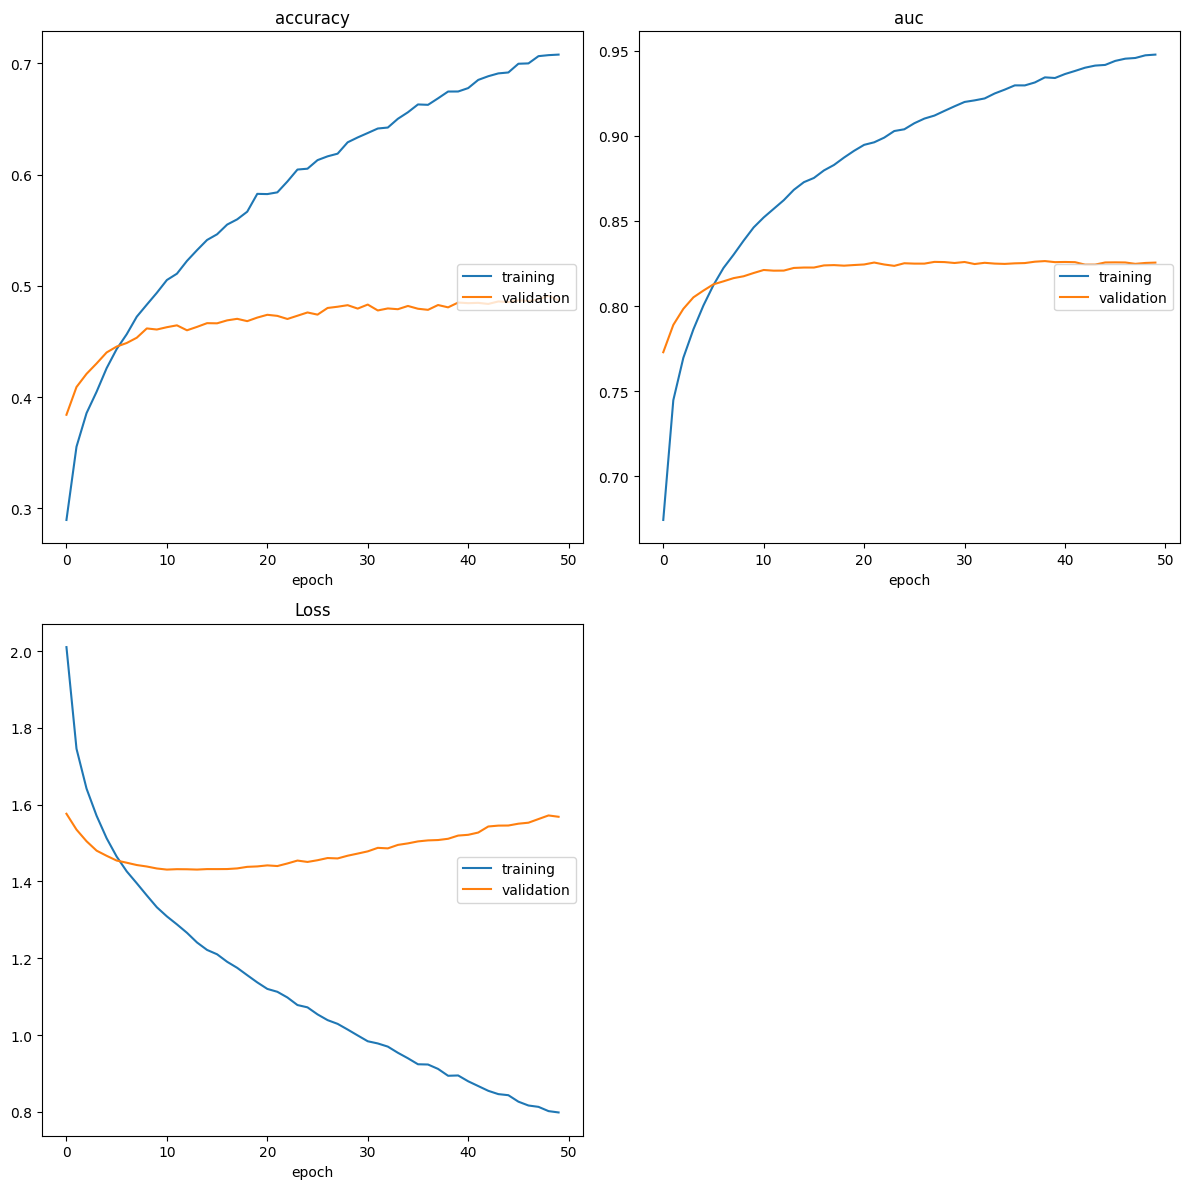

accuracy
	training         	 (min:    0.290, max:    0.708, cur:    0.708)
	validation       	 (min:    0.384, max:    0.491, cur:    0.487)
auc
	training         	 (min:    0.674, max:    0.948, cur:    0.948)
	validation       	 (min:    0.773, max:    0.826, cur:    0.826)
Loss
	training         	 (min:    0.798, max:    2.010, cur:    0.798)
	validation       	 (min:    1.431, max:    1.576, cur:    1.568)


In [24]:
from tensorflow.keras.optimizers import Adam
from livelossplot import PlotLossesKeras

opt = Adam(lr=0.0001)
c1=PlotLossesKeras()
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy','AUC'])
history=model.fit(X_train,y_train,epochs=50,callbacks=[c1,c3],batch_size=64,validation_data=(X_test, y_test))

# from keras import callbacks
# filename='model_train_new.csv'
# filepath="C:/Users/dhruv/Desktop/SEM 2/Applied AI/Proj B/Dataset/checkpoints.hdf5"

# csv_log=callbacks.CSVLogger(filename, separator=',', append=False)
# checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# callbacks_list = [csv_log,checkpoint]
# callbacks_list = [csv_log]
# hist = model.fit(X_train, y_train, batch_size=2, epochs=25, verbose=1, validation_data=(X_test, y_test),callbacks=callbacks_list)

In [29]:

model.evaluate(X_test,y_test,callbacks=[c2,c3],batch_size=64)

113/113 [==============================] - 2s 21ms/step - loss: 1.5685 - accuracy: 0.4872 - auc: 0.8255


[1.56846022605896, 0.4871830642223358, 0.8255075216293335]

In [30]:
model.save("FER_VGG19.h5")

In [6]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import *

models=load_model("FER_VGG19.h5")

In [7]:
from PIL import Image
import glob

def predictor(filename) :
    test_image = filename
    image_result = Image.open(test_image)
    # test_image = image.load_img(test_image, target_size=(100,100))
    test_image = image.load_img(test_image, target_size=(48,48,3))
    test_image = image.img_to_array(test_image)
    test_image = test_image/255
    test_image = np.expand_dims(test_image, axis=0)
    result = models.predict(test_image)
    r = np.max(result)
    per = r*100
    percentage = round(per,4)
    categories = ['anger','contempt','disgust','fear','happy','sadness','surprise']
    image_result = plt.imshow(image_result)
    output = categories[np.argmax(result)]
#     output = np.argmax(result)
    return result,percentage,output
EMOTION_DETECTOR = predictor('C:/Users/dhruv/Desktop/SEM 2/Applied AI/Proj B/Dataset/FER/test/happy/PrivateTest_3402902.jpg')
print(EMOTION_DETECTOR)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/dhruv/Desktop/SEM 2/Applied AI/Proj B/Dataset/FER/test/happy/PrivateTest_3402902.jpg'

In [8]:
from mtcnn import MTCNN
from PIL import Image
import glob
# load face detector
detector = MTCNN()


In [9]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

def detect_face(img):
    
    mt_res = detector.detect_faces(img)
    return_res = []
    
    for face in mt_res:
        x, y, width, height = face['box']
        center = [x+(width/2), y+(height/2)]
        max_border = max(width, height)
        
        # center alignment
        left = max(int(center[0]-(max_border/2)), 0)
        right = max(int(center[0]+(max_border/2)), 0)
        top = max(int(center[1]-(max_border/2)), 0)
        bottom = max(int(center[1]+(max_border/2)), 0)
        
        # crop the face
        center_img_k = img[top:top+max_border, 
                           left:left+max_border, :]
        center_img = np.array(Image.fromarray(center_img_k).resize([64, 64]))
        print("center_img--------------",center_img)

        # create predictions
#         sex_preds = sex_model.predict(center_img.reshape(1,224,224,3))[0][0]
#         age_preds = age_model.predict(center_img.reshape(1,224,224,3))[0][0]

#         test_image = image.load_img(center_img, target_size=(64,64,3))
        test_image = image.img_to_array(center_img)
        test_image = test_image/255
        test_image = np.expand_dims(test_image, axis=0)
        emotion_preds = models.predict(test_image)
        
        # convert to grey scale then predict using the emotion model
#         grey_img = np.array(Image.fromarray(center_img_k).resize([256, 256]))
#         emotion_preds = models.predict(center_img.reshape(1,64,64, 3))
        
        # output to the cv2
        return_res.append([top, right, bottom, left, emotion_preds])
#         return_res.append([top, right, bottom, left, sex_preds, age_preds, emotion_preds])
        
    return return_res

In [10]:
# Get a reference to webcam 
video_capture = cv2.VideoCapture(0)
# print("video_capture--------------",video_capture)

emotion_dict = {
    0: 'anger',
    1: 'disgust', 
    2: 'fear',
    3: 'happy',
    4: 'neutral',
    5: 'sad',
    6: 'surprise'
}

while True:
    # Grab a single frame of video
    ret, frame = video_capture.read()
    print("--------------",frame.shape)
    # Convert the image from BGR color (which OpenCV uses) to RGB color 
    rgb_frame = frame[:, :, ::-1]
    print("rgb_frame--------------",rgb_frame.shape)
    # Find all the faces in the current frame of video
    face_locations = detect_face(rgb_frame)
    print("face_locations--------------",face_locations)

    # Display the results
    for top, right, bottom, left, emotion_preds in face_locations:
        # Draw a box around the face
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)
        
#         sex_text = 'Female' if sex_preds > 0.5 else 'Male'
#         cv2.putText(frame, 'Sex: {}({:.3f})'.format(sex_text, sex_preds), (left, top-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (36,255,12), 1)
#         cv2.putText(frame, 'Age: {:.3f}'.format(age_preds), (left, top-25), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (36,255,12), 1)
        cv2.putText(frame, 'Emotion: {}({:.3f})'.format(emotion_dict[np.argmax(emotion_preds)], np.max(emotion_preds)), (left, top-40), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (36,255,12), 1)
        
    # Display the resulting image
    cv2.imshow('Video', frame)

    # Hit 'q' on the keyboard to quit!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release handle to the webcam
video_capture.release()
cv2.destroyAllWindows()

-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[217 217 217]
  [194 194 194]
  [183 183 183]
  ...
  [243 243 245]
  [228 228 228]
  [207 207 207]]

 [[158 154 158]
  [149 145 146]
  [136 134 134]
  ...
  [237 237 237]
  [202 202 202]
  [188 188 188]]

 [[234 232 236]
  [231 231 231]
  [224 224 222]
  ...
  [209 209 209]
  [189 189 189]
  [178 178 178]]

 ...

 [[ 14  14  16]
  [ 31  32  30]
  [ 49  50  47]
  ...
  [ 68  68  68]
  [ 67  67  67]
  [ 54  54  54]]

 [[ 10  13  12]
  [ 21  19  18]
  [ 46  41  41]
  ...
  [ 70  70  70]
  [ 63  63  63]
  [ 51  51  51]]

 [[ 13  13  13]
  [ 25  13  17]
  [ 43  26  32]
  ...
  [ 69  69  69]
  [ 55  55  55]
  [ 47  47  47]]]
face_locations-------------- [[83, 473, 343, 213, array([[4.3328609e-02, 8.9069135e-06, 1.1581547e-02, 6.7980272e-01,
        2.9250646e-02, 2.3501799e-01, 1.0094849e-03]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-----------

center_img-------------- [[[241 241 243]
  [241 241 243]
  [241 241 243]
  ...
  [241 241 243]
  [241 241 243]
  [241 241 243]]

 [[241 241 243]
  [241 241 243]
  [242 242 244]
  ...
  [241 241 243]
  [241 241 243]
  [241 241 243]]

 [[241 241 243]
  [241 241 243]
  [243 243 245]
  ...
  [241 241 243]
  [241 241 243]
  [242 242 244]]

 ...

 [[148 146 154]
  [153 152 156]
  [152 151 155]
  ...
  [185 185 185]
  [182 182 182]
  [158 158 158]]

 [[142 141 150]
  [148 148 152]
  [150 150 152]
  ...
  [184 184 184]
  [174 174 174]
  [153 153 153]]

 [[131 127 140]
  [143 142 150]
  [147 148 150]
  ...
  [185 185 185]
  [170 170 170]
  [146 146 146]]]
face_locations-------------- [[85, 473, 338, 220, array([[4.8190051e-01, 2.3106495e-05, 1.4854388e-01, 1.1882824e-01,
        1.9703339e-01, 5.3131483e-02, 5.3938827e-04]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[241 241 243]
  [241 241 243]
  [241 241 243]
  ...
  [241 24

center_img-------------- [[[241 241 243]
  [241 241 243]
  [241 241 243]
  ...
  [241 241 243]
  [241 241 243]
  [241 241 243]]

 [[241 241 243]
  [241 241 243]
  [241 241 243]
  ...
  [241 241 243]
  [241 241 243]
  [241 241 243]]

 [[241 241 243]
  [241 241 243]
  [241 241 243]
  ...
  [241 241 243]
  [241 241 243]
  [241 241 243]]

 ...

 [[158 158 161]
  [156 156 157]
  [154 154 155]
  ...
  [188 188 188]
  [165 165 165]
  [172 172 172]]

 [[152 151 156]
  [156 156 156]
  [152 151 156]
  ...
  [185 185 185]
  [159 159 159]
  [164 164 164]]

 [[145 145 149]
  [151 150 154]
  [150 150 154]
  ...
  [183 183 183]
  [157 157 157]
  [166 166 166]]]
face_locations-------------- [[73, 479, 332, 220, array([[1.2394583e-01, 4.6821951e-06, 2.0134161e-01, 3.2610944e-01,
        3.1459317e-01, 3.3837620e-02, 1.6767993e-04]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[241 241 243]
  [241 241 243]
  [241 241 243]
  ...
  [241 24

center_img-------------- [[[241 241 243]
  [241 241 243]
  [241 241 243]
  ...
  [242 242 244]
  [241 241 243]
  [241 241 243]]

 [[241 241 243]
  [241 241 243]
  [239 239 241]
  ...
  [242 242 243]
  [241 241 242]
  [241 241 243]]

 [[241 241 243]
  [241 241 243]
  [241 241 243]
  ...
  [216 216 216]
  [242 242 243]
  [241 241 243]]

 ...

 [[157 157 159]
  [155 155 157]
  [156 156 158]
  ...
  [168 168 168]
  [177 177 177]
  [189 189 189]]

 [[148 148 149]
  [154 154 155]
  [153 153 154]
  ...
  [166 166 166]
  [176 176 176]
  [190 190 190]]

 [[141 140 145]
  [148 147 151]
  [150 150 152]
  ...
  [176 176 176]
  [182 182 182]
  [188 188 188]]]
face_locations-------------- [[82, 470, 333, 219, array([[5.2715600e-02, 7.7973681e-07, 1.2729013e-01, 5.6455547e-01,
        2.0962171e-01, 4.5804366e-02, 1.1967188e-05]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[241 241 243]
  [241 241 243]
  [240 240 242]
  ...
  [241 24

center_img-------------- [[[238 238 239]
  [241 241 243]
  [241 241 243]
  ...
  [240 240 242]
  [241 241 243]
  [241 241 243]]

 [[239 239 240]
  [241 241 243]
  [241 241 243]
  ...
  [234 234 236]
  [243 243 245]
  [242 242 244]]

 [[237 237 238]
  [241 241 243]
  [241 241 243]
  ...
  [224 224 225]
  [236 236 238]
  [231 231 232]]

 ...

 [[ 61  59  94]
  [ 61  56  90]
  [ 63  54  85]
  ...
  [173 128 136]
  [180  94  98]
  [203  83  92]]

 [[ 59  61  89]
  [ 81  60  84]
  [146  68  97]
  ...
  [172  77  93]
  [225  75  97]
  [232  78  96]]

 [[ 75  72  85]
  [142  74  94]
  [212  77 111]
  ...
  [100  51  65]
  [174  77  95]
  [226  77  97]]]
face_locations-------------- [[88, 476, 368, 196, array([[3.2310769e-01, 1.3919680e-04, 9.9038549e-02, 4.2464131e-01,
        5.9033543e-02, 8.9507602e-02, 4.5321039e-03]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[241 241 243]
  [241 241 243]
  [241 241 243]
  ...
  [241 24

center_img-------------- [[[241 241 243]
  [241 241 243]
  [242 242 244]
  ...
  [241 241 243]
  [241 241 243]
  [242 242 244]]

 [[241 241 243]
  [241 241 243]
  [241 241 243]
  ...
  [243 243 245]
  [242 242 244]
  [240 240 242]]

 [[241 241 243]
  [242 242 244]
  [238 238 241]
  ...
  [241 241 243]
  [239 239 240]
  [216 216 217]]

 ...

 [[131 118 130]
  [140 139 145]
  [145 145 148]
  ...
  [162 162 162]
  [142 142 142]
  [159 159 159]]

 [[135  87 106]
  [134 127 135]
  [138 140 142]
  ...
  [148 147 147]
  [135 135 135]
  [150 150 150]]

 [[147  62  89]
  [137 100 115]
  [135 133 136]
  ...
  [137 136 137]
  [133 136 135]
  [144 143 144]]]
face_locations-------------- [[88, 480, 349, 219, array([[1.0205322e-01, 9.0750116e-05, 3.2219294e-02, 5.1952541e-01,
        3.1721053e-01, 1.7752310e-02, 1.1148539e-02]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[241 241 243]
  [241 241 243]
  [241 241 243]
  ...
  [241 24

center_img-------------- [[[241 241 243]
  [242 242 244]
  [238 238 240]
  ...
  [242 242 244]
  [242 242 244]
  [233 233 235]]

 [[241 241 243]
  [242 242 244]
  [230 230 232]
  ...
  [241 241 242]
  [237 237 238]
  [203 203 204]]

 [[241 241 243]
  [242 242 244]
  [225 225 226]
  ...
  [220 220 222]
  [196 196 196]
  [170 170 170]]

 ...

 [[135 120 126]
  [138 138 143]
  [143 143 145]
  ...
  [145 145 145]
  [139 140 139]
  [155 155 155]]

 [[138  83 101]
  [135 124 133]
  [137 137 142]
  ...
  [134 133 133]
  [136 139 138]
  [146 146 146]]

 [[150  58  86]
  [138  98 113]
  [131 129 133]
  ...
  [127 126 126]
  [134 129 130]
  [117  95 101]]]
face_locations-------------- [[92, 481, 352, 221, array([[1.71705514e-01, 1.12273876e-04, 6.20377325e-02, 4.71973836e-01,
        2.67773837e-01, 1.59320123e-02, 1.04648173e-02]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[241 241 243]
  [241 241 243]
  [241 241 243]
  ...
  

center_img-------------- [[[240 240 242]
  [241 241 242]
  [214 214 214]
  ...
  [243 243 245]
  [214 214 216]
  [177 177 177]]

 [[241 241 243]
  [242 242 244]
  [205 205 206]
  ...
  [233 233 235]
  [184 184 185]
  [163 163 163]]

 [[242 242 244]
  [236 236 238]
  [197 197 199]
  ...
  [203 203 204]
  [163 163 163]
  [153 153 153]]

 ...

 [[142 140 145]
  [143 144 145]
  [146 146 146]
  ...
  [157 157 157]
  [171 171 170]
  [126 126 126]]

 [[135 130 135]
  [138 140 141]
  [142 143 142]
  ...
  [149 152 151]
  [137 134 135]
  [109  79  84]]

 [[137 113 123]
  [133 131 136]
  [139 139 141]
  ...
  [122 112 115]
  [118  74  81]
  [178  79  93]]]
face_locations-------------- [[88, 489, 351, 226, array([[1.9102952e-01, 1.1761929e-05, 4.8406285e-01, 1.1203491e-01,
        1.2799549e-01, 8.1439100e-02, 3.4263264e-03]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[241 241 243]
  [241 241 243]
  [241 241 243]
  ...
  [241 24

center_img-------------- [[[241 241 243]
  [241 241 243]
  [241 241 243]
  ...
  [242 242 244]
  [238 238 240]
  [196 196 196]]

 [[241 241 243]
  [241 241 243]
  [241 241 243]
  ...
  [245 245 247]
  [214 214 216]
  [170 170 171]]

 [[241 241 243]
  [241 241 243]
  [241 241 243]
  ...
  [235 235 236]
  [178 178 179]
  [153 153 154]]

 ...

 [[ 83  61  87]
  [151  62  92]
  [151  61  87]
  ...
  [134 135 135]
  [132 135 134]
  [114  98 101]]

 [[ 94  60  85]
  [171  66  96]
  [166  55  85]
  ...
  [119 104 106]
  [131  77  88]
  [173  78  91]]

 [[130  65  91]
  [175  64  96]
  [172  57  89]
  ...
  [185  79  94]
  [212  81  99]
  [221  75  96]]]
face_locations-------------- [[87, 487, 359, 215, array([[1.8673632e-01, 4.3581305e-05, 2.8282437e-01, 4.5325255e-01,
        3.9245114e-02, 3.2750454e-02, 5.1476187e-03]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[241 241 243]
  [241 241 243]
  [241 241 243]
  ...
  [241 24

center_img-------------- [[[244 244 245]
  [218 218 218]
  [194 194 194]
  ...
  [241 241 243]
  [241 241 243]
  [241 241 243]]

 [[231 231 232]
  [211 211 212]
  [195 195 195]
  ...
  [241 241 243]
  [241 241 243]
  [241 241 243]]

 [[236 236 238]
  [223 223 225]
  [197 197 198]
  ...
  [241 241 243]
  [241 241 243]
  [241 241 243]]

 ...

 [[169 169 170]
  [161 161 162]
  [157 157 158]
  ...
  [191 193 192]
  [173 173 173]
  [177 179 178]]

 [[165 166 167]
  [163 163 163]
  [161 161 161]
  ...
  [189 189 189]
  [166 166 166]
  [173 173 173]]

 [[165 166 165]
  [161 161 162]
  [158 158 158]
  ...
  [185 185 185]
  [159 159 159]
  [167 167 167]]]
face_locations-------------- [[83, 475, 321, 237, array([[3.6550504e-01, 1.2956972e-05, 7.0323348e-02, 1.4977872e-01,
        3.8002992e-01, 3.2022320e-02, 2.3276543e-03]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[239 239 241]
  [238 238 240]
  [211 211 213]
  ...
  [241 24

center_img-------------- [[[232 232 234]
  [206 206 207]
  [191 191 191]
  ...
  [241 241 243]
  [241 241 243]
  [241 241 243]]

 [[242 242 244]
  [215 215 216]
  [195 195 195]
  ...
  [241 241 244]
  [241 241 244]
  [242 242 244]]

 [[242 242 244]
  [220 220 222]
  [200 200 202]
  ...
  [239 239 242]
  [240 240 242]
  [239 239 240]]

 ...

 [[162 162 164]
  [158 158 159]
  [159 159 160]
  ...
  [189 189 189]
  [192 192 192]
  [173 173 173]]

 [[164 164 165]
  [159 159 159]
  [159 159 159]
  ...
  [186 186 186]
  [189 189 189]
  [163 163 163]]

 [[160 160 160]
  [156 156 156]
  [158 158 158]
  ...
  [190 190 190]
  [186 186 186]
  [159 159 159]]]
face_locations-------------- [[90, 472, 323, 239, array([[3.5107851e-01, 5.8420519e-06, 2.1399231e-01, 7.8966945e-02,
        3.0887383e-01, 4.7031339e-02, 5.1148301e-05]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[240 240 242]
  [240 240 241]
  [208 208 208]
  ...
  [241 24

center_img-------------- [[[243 243 245]
  [227 227 229]
  [196 196 197]
  ...
  [241 241 243]
  [241 241 243]
  [241 241 243]]

 [[242 242 244]
  [229 229 231]
  [197 197 197]
  ...
  [241 241 243]
  [241 241 243]
  [241 241 243]]

 [[242 242 244]
  [232 232 233]
  [197 197 196]
  ...
  [241 241 243]
  [241 241 243]
  [241 241 243]]

 ...

 [[181 181 181]
  [164 164 164]
  [157 157 159]
  ...
  [196 196 196]
  [185 185 185]
  [190 190 190]]

 [[179 176 178]
  [157 159 160]
  [153 152 156]
  ...
  [193 193 193]
  [178 178 178]
  [182 182 182]]

 [[170 171 171]
  [160 160 160]
  [152 152 153]
  ...
  [191 191 191]
  [175 175 175]
  [177 177 177]]]
face_locations-------------- [[73, 478, 316, 235, array([[2.0801950e-01, 2.0711028e-05, 2.4756791e-02, 3.8940436e-01,
        3.7256604e-01, 3.7237713e-03, 1.5088078e-03]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[241 241 243]
  [238 238 240]
  [204 204 205]
  ...
  [241 24

In [ ]:
# print("Performance Report:")
# y_pred8=model.predict_classes(X_test)
# y_test8=[np.argmax(x) for x in y_test]
# y_pred_prb8=model.predict_proba(x_test)
# target=['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
# from sklearn import metrics
# print('Accuracy score is :', np.round(metrics.accuracy_score(y_test8, y_pred8),4))
# print('Precision score is :', np.round(metrics.precision_score(y_test8, y_pred8, average='weighted'),4))
# print('Recall score is :', np.round(metrics.recall_score(y_test8,y_pred8, average='weighted'),4))
# print('F1 Score is :', np.round(metrics.f1_score(y_test8, y_pred8, average='weighted'),4))
# print('ROC AUC Score is :', np.round(metrics.roc_auc_score(y_test8, y_pred_prb8,multi_class='ovo', average='weighted'),4))
# print('Cohen Kappa Score:', np.round(metrics.cohen_kappa_score(y_test8, y_pred8),4))
# print('\t\tClassification Report:\n', metrics.classification_report(y_test8, y_pred8,target_names=target))

NameError: name 'Y' is not defined